<a href="https://colab.research.google.com/github/Bilol2747/Data_Analytics_Portfolio/blob/main/ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

%matplotlib inline

In [ ]:
np.random.seed(0)
sentroid= [[3,3], [-3, -2], [2, -3], [0, 0]]
x, y = make_blobs(n_samples=5000, centers=sentroid, cluster_std=0.8)

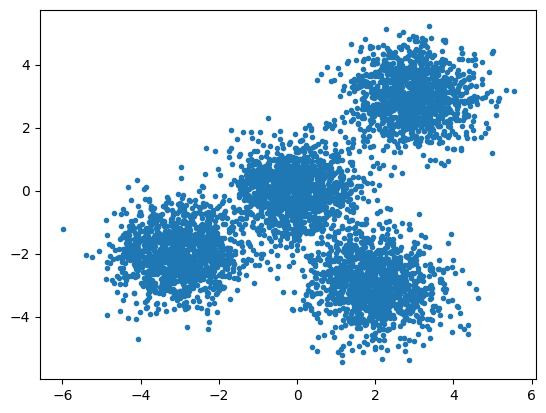

In [ ]:
plt.scatter(x[:,0], x[:,1], marker='.')
plt.show()

In [ ]:
k_means= KMeans(init='random', n_clusters=4, n_init=15)
k_means.fit(x)

KMeans(init='random', n_clusters=4, n_init=15)

In [ ]:
k_means.labels_

array([1, 0, 0, ..., 3, 1, 1], dtype=int32)

In [ ]:
k_means.cluster_centers_

array([[ 1.99225644e+00, -3.00803810e+00],
       [-3.02096674e+00, -1.99572917e+00],
       [-3.37546426e-02,  2.53088821e-03],
       [ 2.97795387e+00,  2.99317691e+00]])

In [ ]:
print(np.round(k_means.cluster_centers_))

[[ 2. -3.]
 [-3. -2.]
 [-0.  0.]
 [ 3.  3.]]


In [ ]:
print(sentroid)

[[3, 3], [-3, -2], [2, -3], [0, 0]]


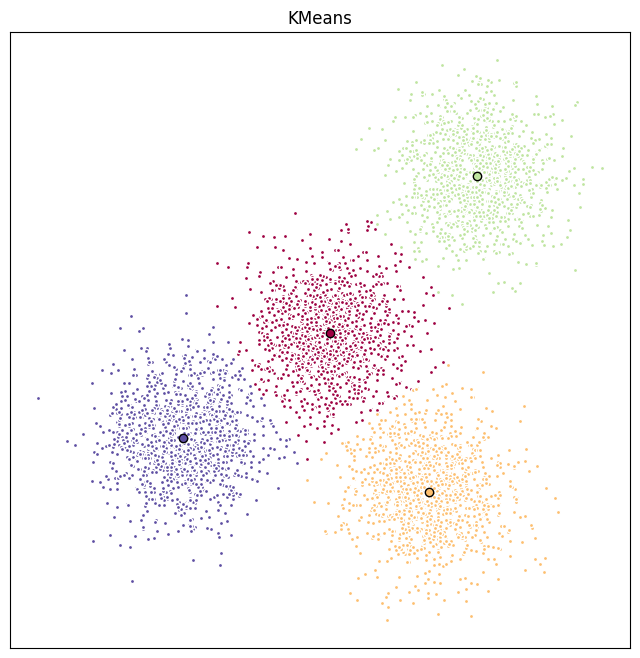

In [ ]:
fig=plt.figure(figsize=(8, 8))
colors= plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax=fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):
  my_members=(k_means.labels_==k)
  cluster_center=k_means.cluster_centers_[k]
  ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [ ]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
from sklearn.preprocessing import StandardScaler
x=df.values[:,1:]
x = np.nan_to_num(x)
norm_data=StandardScaler().fit_transform(x)

In [ ]:
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [ ]:
k=3
k_means=KMeans(n_clusters=k)
k_means.fit(norm_data)
print(k_means.labels_)

[1 0 2 1 0 0 1 1 1 0 2 1 1 1 2 1 1 1 0 1 1 1 2 0 0 1 1 1 1 1 1 0 2 1 1 1 2
 2 1 0 2 0 1 0 1 0 1 1 1 1 0 0 2 1 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 0 1 1 2 0 1 0 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 0 1 2 2 0 1 1 1 1 1
 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2
 1 1 1 0 2 1 1 1 1 0 2 2 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 2 0 2 1 1 0 2
 0 1 1 1 1 1 0 1 2 1 1 1 0 0 1 0 1 2 1 1 2 1 0 1 2 1 1 1 1 1 2 2 0 1 1 2 0
 1 1 1 1 0 1 1 2 1 1 1 1 0 1 1 2 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 2 1 2 1
 1 1 0 1 2 0 2 1 0 1 1 2 1 1 1 1 2 2 2 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 2 1 1
 2 1 2 0 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 0 1 2 1 1 1 2 2 1 1 1 0 2
 1 1 2 1 0 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 2 1 2 1 1 1 0 0 1
 2 1 0 2 2 1 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 1 1 1 2 1 1 2 2
 0 1 1 1 1 1 2 2 1 0 2 0 1 1 2 1 1 0 0 1 2 1 1 0 1 2 1 0 1 1 1 0 1 1 1 1 0
 1 2 1 1 1 1 0 2 1 1 0 1 2 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 2 1
 2 1 1 1 1 1 0 2 2 1 0 1 

In [ ]:
cor=df.corr()
cor.style.background_gradient(cmap='coolwarm')

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,1.000000,-0.004447,-0.031113,-0.035146,-0.017675,0.001015,-0.009061,-0.004244,0.014039,0.000107
Age,-0.004447,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240,0.408582
Edu,-0.031113,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053,0.015695
Years Employed,-0.035146,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625,0.582182
Income,-0.017675,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585,0.533752
Card Debt,0.001015,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971,0.354911
Other Debt,-0.009061,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545,0.431673
Defaulted,-0.004244,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575,-0.682432
DebtIncomeRatio,0.014039,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000,-0.024336
cluster,0.000107,0.408582,0.015695,0.582182,0.533752,0.354911,0.431673,-0.682432,-0.024336,1.000000


In [ ]:
df['cluster']=k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
df.cluster.value_counts()

,count
cluster,
1,537
2,166
0,147


In [ ]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
